In [1]:
import zipfile
import os
import shutil

# Chemin du fichier ZIP principal
zip_file_path = 'Retinopathy.zip'
extract_path = 'retinopathy_extracted'

# Fonction pour extraire les fichiers ZIP
def extract_zip(zip_path, extract_path):
    if os.path.exists(extract_path):
        shutil.rmtree(extract_path)
    os.makedirs(extract_path)
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extraction de {zip_path} terminée.")
    except zipfile.BadZipFile:
        print(f"Erreur : {zip_path} n'est pas un fichier ZIP valide.")
    except FileNotFoundError:
        print(f"Erreur : {zip_path} n'a pas été trouvé.")
    except Exception as e:
        print(f"Erreur lors de l'extraction de {zip_path} : {e}")

# Extraire le fichier ZIP principal
extract_zip(zip_file_path, extract_path)

print("Extraction terminée.")


Extraction de Retinopathy.zip terminée.
Extraction terminée.


Sous-dossier: Mild, Nombre d'images: 217
Sous-dossier: Moderate, Nombre d'images: 563
Sous-dossier: No_DR, Nombre d'images: 1026
Sous-dossier: Proliferate_DR, Nombre d'images: 166
Sous-dossier: Severe, Nombre d'images: 104


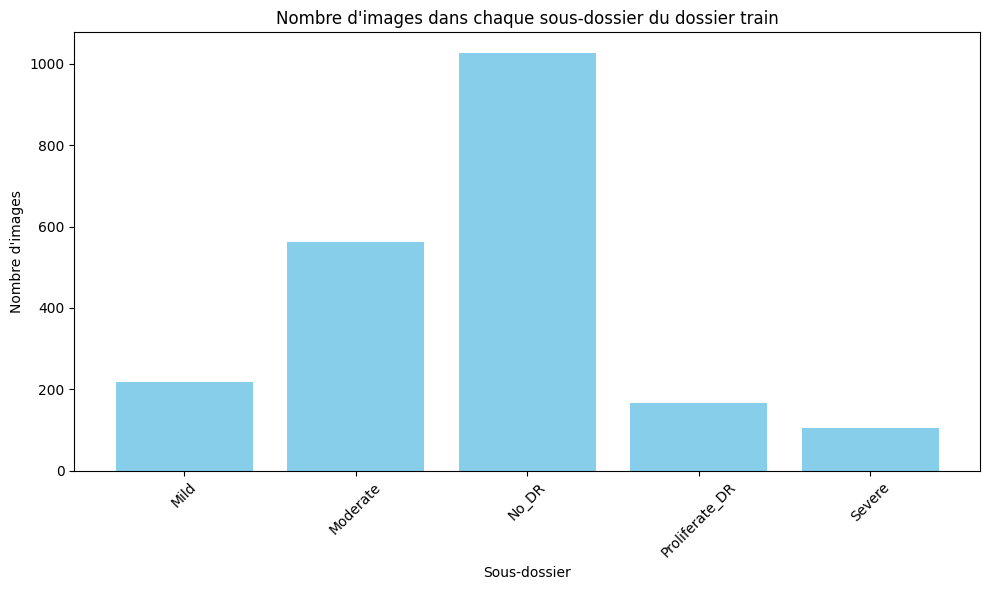

In [15]:
import os
import matplotlib.pyplot as plt
# Chemin vers le dossier train
train_path = os.path.join(extract_path, 'train')
# Vérifier si le dossier train existe
if not os.path.exists(train_path):
    print(f"Le dossier {train_path} n'existe pas.")
else:
    # Dictionnaire pour stocker le nombre d'images dans chaque sous-dossier
    image_counts = {}
    # Parcourir chaque sous-dossier dans le dossier train
    for root, dirs, files in os.walk(train_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            image_files = [f for f in os.listdir(dir_path) if f.endswith(('.jpeg', '.jpg', '.png'))]
            image_counts[dir_name] = len(image_files)
    # Afficher le nombre d'images dans chaque sous-dossier
    for dir_name, count in image_counts.items():
        print(f"Sous-dossier: {dir_name}, Nombre d'images: {count}")
    # Visualisation des résultats sous forme de diagramme à barres
    plt.figure(figsize=(10, 6))
    plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
    plt.xlabel('Sous-dossier')
    plt.ylabel('Nombre d\'images')
    plt.title('Nombre d\'images dans chaque sous-dossier du dossier train')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Organizing training images...
Catégorie: No_DR, Nombre d'images: 1026
Catégorie: DR, Nombre d'images: 1050
Organizing test images...
Catégorie: No_DR, Nombre d'images: 118
Catégorie: DR, Nombre d'images: 113
Organizing validation images...
Catégorie: No_DR, Nombre d'images: 286
Catégorie: DR, Nombre d'images: 245


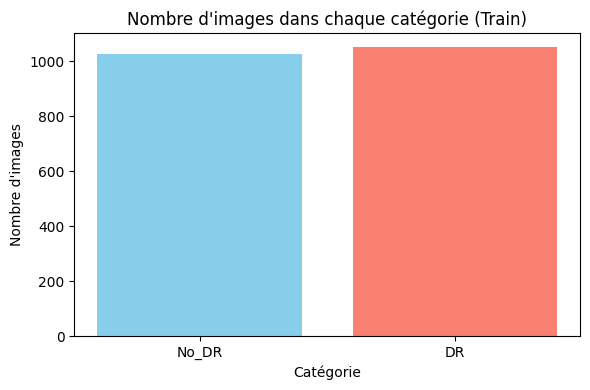

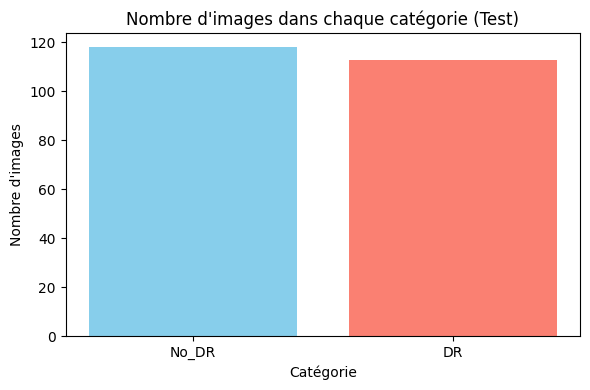

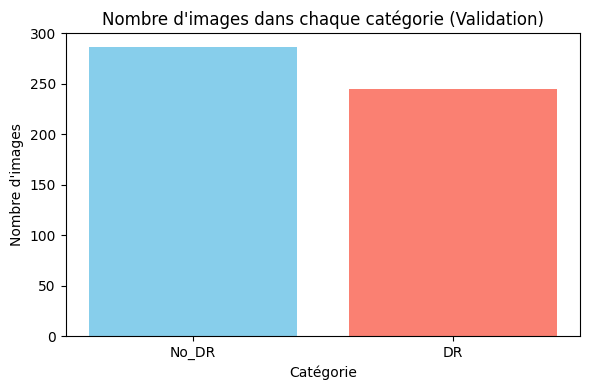

In [16]:
import os
import shutil
import matplotlib.pyplot as plt
# Fonction pour organiser les images en sous-dossiers 'DR' et 'No_DR'
def organize_images(src_folder):
    dr_path = os.path.join(src_folder, 'DR')
    no_dr_path = os.path.join(src_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    # Parcourir les sous-dossiers dans le dossier source
    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            if dir_name != 'No_DR' and dir_name != 'DR':
                for file_name in os.listdir(dir_path):
                    if file_name.endswith(('.jpeg', '.jpg', '.png')):
                        file_path = os.path.join(dir_path, file_name)
                        # Déplacer les fichiers dans le dossier approprié
                        if 'no_dr' in dir_name.lower():
                            shutil.move(file_path, no_dr_path)
                        else:
                            shutil.move(file_path, dr_path)
                # Supprimer le sous-dossier après avoir déplacé les fichiers
                shutil.rmtree(dir_path)
    # Compter le nombre d'images dans 'No_DR' et 'DR'
    image_counts = {'No_DR': 0, 'DR': 0}
    # Compter les images dans le dossier 'No_DR'
    if os.path.exists(no_dr_path):
        image_counts['No_DR'] = len([f for f in os.listdir(no_dr_path) if f.endswith(('.jpeg', '.jpg', '.png'))])
    # Compter les images dans le dossier 'DR'
    if os.path.exists(dr_path):
        image_counts['DR'] = len([f for f in os.listdir(dr_path) if f.endswith(('.jpeg', '.jpg', '.png'))])
    # Afficher le nombre d'images dans chaque catégorie
    for category, count in image_counts.items():
        print(f"Catégorie: {category}, Nombre d'images: {count}")
    return image_counts
# Chemin des dossiers d'extraction
extract_path = 'retinopathy_extracted'
# Organiser les images dans les dossiers 'train', 'test' et 'valid'
train_path = os.path.join(extract_path, 'train')
test_path = os.path.join(extract_path, 'test')
validation_path = os.path.join(extract_path, 'valid')
print("Organizing training images...")
train_counts = organize_images(train_path)
print("Organizing test images...")
test_counts = organize_images(test_path)
print("Organizing validation images...")
validation_counts = organize_images(validation_path)
# Visualisation des résultats sous forme de diagramme à barres pour chaque dossier
def plot_image_counts(counts, title):
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon'])
    plt.xlabel('Catégorie')
    plt.ylabel("Nombre d'images")
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_image_counts(train_counts, 'Nombre d\'images dans chaque catégorie (Train)')
plot_image_counts(test_counts, 'Nombre d\'images dans chaque catégorie (Test)')
plot_image_counts(validation_counts, 'Nombre d\'images dans chaque catégorie (Validation)')


In [17]:
#juste pour la suppression des dossiers remplies
import shutil
import os

# Chemin du dossier à supprimer
folder_path = ''

# Vérifier si le dossier existe
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Le dossier {folder_path} a été supprimé.")
else:
    print(f"Le dossier {folder_path} n'existe pas.")


Le dossier  n'existe pas.


In [18]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import os
from PIL import Image
# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_extracted/train',
    'valid': 'retinopathy_extracted/valid',
    'test': 'retinopathy_extracted/test'
}
dest_folders = {
    'train': 'retinopathy_resized/train',
    'valid': 'retinopathy_resized/valid',
    'test': 'retinopathy_resized/test'
}

# Taille des images redimensionnées
new_size = (256, 256)  # Exemple : 256x256 pixels
# Fonction pour redimensionner et sauvegarder les images
def resize_images(src_folder, dst_folder, size):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    img_resized = img.resize(size, Image.LANCZOS)                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                    img_resized.save(new_file_path)
                    print(f"Image {file} redimensionnée et sauvegardée dans {new_file_path}")
# Redimensionner les images pour les dossiers train, valid, test
for key in source_folders:
    print(f"Redimensionnement des images dans le dossier {key}...")
    resize_images(source_folders[key], dest_folders[key], new_size)


Redimensionnement des images dans le dossier train...
Image 000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg redimensionnée et sauvegardée dans retinopathy_resized/train\DR\000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
Image 001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg redimensionnée et sauvegardée dans retinopathy_resized/train\DR\001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg
Image 0024cdab0c1e_png.rf.c429c451f3406b66d0b469a2942b4615.jpg redimensionnée et sauvegardée dans retinopathy_resized/train\DR\0024cdab0c1e_png.rf.c429c451f3406b66d0b469a2942b4615.jpg
Image 0083ee8054ee_png.rf.1490d8387b7078fa60b8e4dfee77e4a5.jpg redimensionnée et sauvegardée dans retinopathy_resized/train\DR\0083ee8054ee_png.rf.1490d8387b7078fa60b8e4dfee77e4a5.jpg
Image 00a8624548a9_png.rf.a43d6bd8144eee1785a4aef237d972c1.jpg redimensionnée et sauvegardée dans retinopathy_resized/train\DR\00a8624548a9_png.rf.a43d6bd8144eee1785a4aef237d972c1.jpg
Image 00e4ddff966a_png.rf.

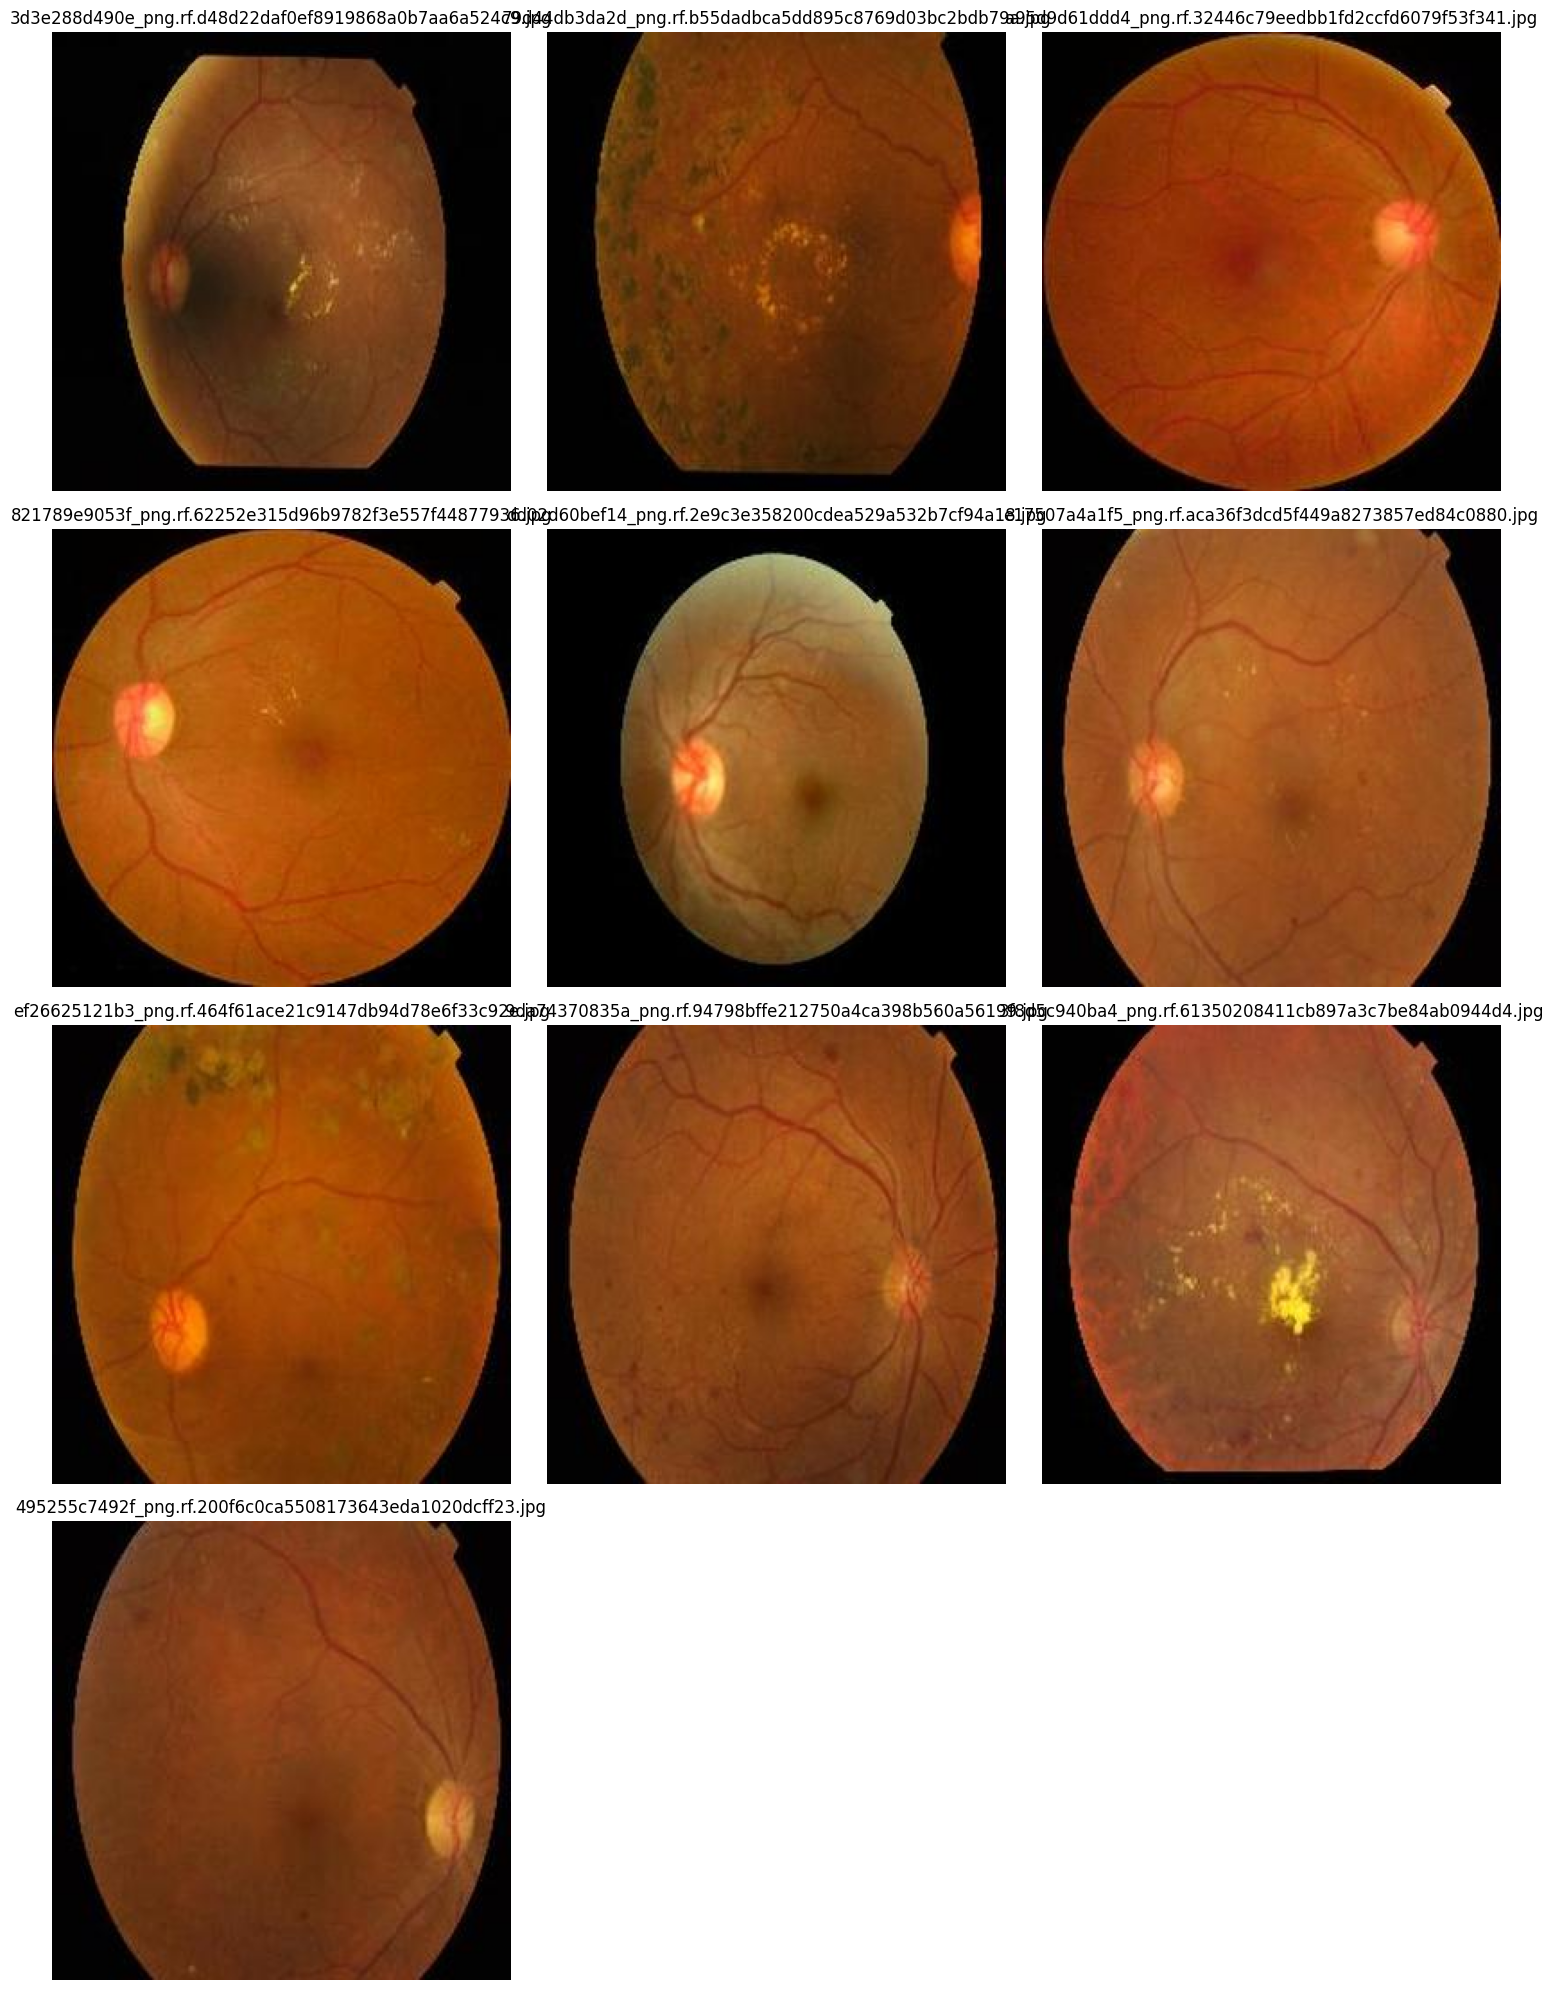

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Fonction pour visualiser les images
def visualize_resized_images(folder, num_images=5):
    all_images = []

    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(('.jpeg', '.jpg', '.png')):
                all_images.append(os.path.join(root, file))

    # Sélectionner un échantillon aléatoire d'images à afficher
    images_to_display = random.sample(all_images, min(num_images, len(all_images)))

    # Définir la grille de visualisation
    num_cols = 3
    num_rows = (len(images_to_display) + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))

    for i, img_path in enumerate(images_to_display):
        plt.subplot(num_rows, num_cols, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualiser les images redimensionnées
visualize_resized_images('retinopathy_resized/train', num_images=10)


In [23]:
import os
import numpy as np
from PIL import Image
# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_resized/train',
    'valid': 'retinopathy_resized/valid',
    'test': 'retinopathy_resized/test'
}
dest_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
}
# Fonction pour normaliser et sauvegarder les images
def normalize_images(src_folder, dst_folder):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    img_array = np.array(img).astype(np.float32)
                    # Normalisation : soustraction de la moyenne et division par l'écart type
                    normalized_img = (img_array - np.mean(img_array)) / np.std(img_array)
                    # Mise à l'échelle des valeurs des pixels entre 0 et 255
                    normalized_img = (normalized_img - normalized_img.min()) / (normalized_img.max() - normalized_img.min()) * 255
                    # Conversion des valeurs des pixels en type entier 8 bits
                    normalized_img = normalized_img.astype(np.uint8)
                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                    # Enregistrer l'image normalisée
                    normalized_img_pil = Image.fromarray(normalized_img)
                    normalized_img_pil.save(new_file_path)
                    print(f"Image {file} normalisée et sauvegardée dans {new_file_path}")
# Normaliser les images pour les dossiers train, valid, test
for key in source_folders:
    print(f"Normalisation des images dans le dossier {key}...")
    normalize_images(source_folders[key], dest_folders[key])

Normalisation des images dans le dossier train...
Image 000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg normalisée et sauvegardée dans retinopathy_normalized/train\DR\000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
Image 001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg normalisée et sauvegardée dans retinopathy_normalized/train\DR\001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg
Image 0024cdab0c1e_png.rf.c429c451f3406b66d0b469a2942b4615.jpg normalisée et sauvegardée dans retinopathy_normalized/train\DR\0024cdab0c1e_png.rf.c429c451f3406b66d0b469a2942b4615.jpg
Image 0083ee8054ee_png.rf.1490d8387b7078fa60b8e4dfee77e4a5.jpg normalisée et sauvegardée dans retinopathy_normalized/train\DR\0083ee8054ee_png.rf.1490d8387b7078fa60b8e4dfee77e4a5.jpg
Image 00a8624548a9_png.rf.a43d6bd8144eee1785a4aef237d972c1.jpg normalisée et sauvegardée dans retinopathy_normalized/train\DR\00a8624548a9_png.rf.a43d6bd8144eee1785a4aef237d972c1.jpg
Image 00e4ddff966a_png.rf.8e3ea3cd2

Traitement des images pour le dataset train...
Image 000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train\DR\000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
Image 000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/train\DR\000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
Image 001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train\DR\001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg
Image 001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/train\DR\001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg
Image 0024cdab0c1e_png.rf.c429c451f3406b66d0b469a2942b4615.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train\DR\0024cdab0c1e_png.rf.c429c4

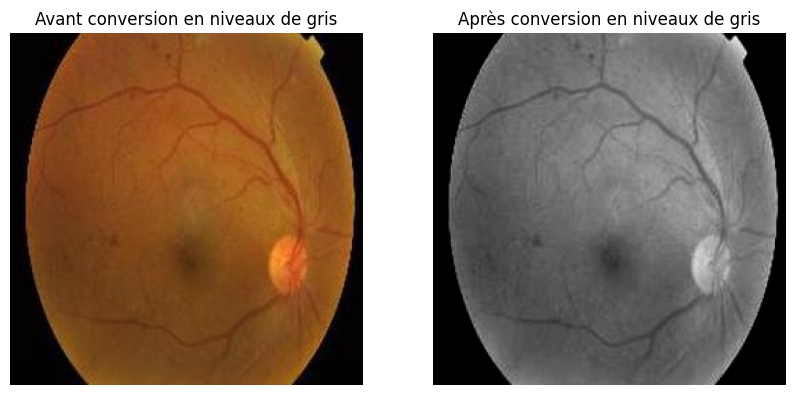

Traitement des images pour le dataset valid...
Image 012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid\DR\012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg
Image 012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/valid\DR\012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg
Image 0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid\DR\0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg
Image 0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/valid\DR\0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg
Image 01eb826f6467_png.rf.2622f7021db54d483355bca84b34c32d.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid\DR\01eb826f6467_png.rf.2622f7

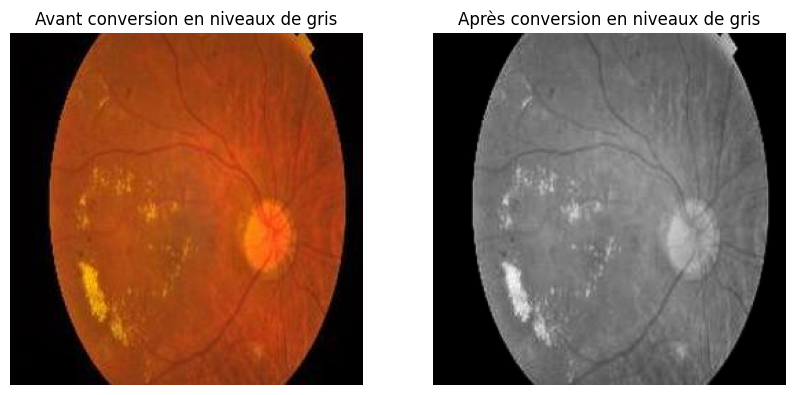

Traitement des images pour le dataset test...
Image 00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
Image 00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
Image 0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test\DR\0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg
Image 0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/test\DR\0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg
Image 03747397839f_png.rf.b634cf9fb09372b2c9c6bc6616bd5d7c.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test\DR\03747397839f_png.rf.b634cf9fb093

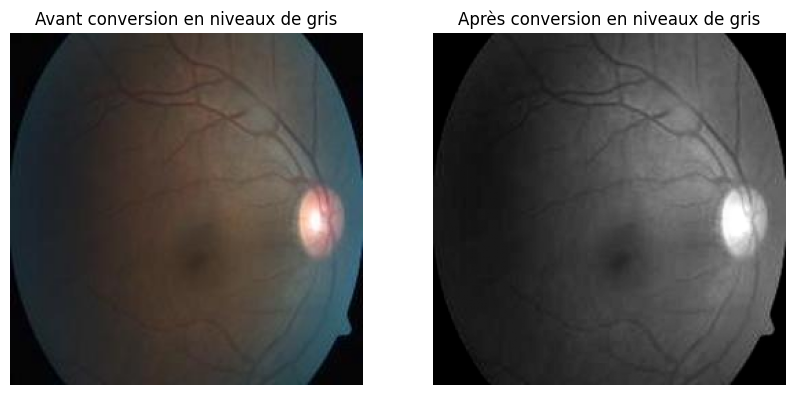

In [24]:
import os
import csv
import random
from PIL import Image, ImageEnhance, ExifTags
import matplotlib.pyplot as plt

# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
}
dest_folders = {
    'train': 'retinopathy_contrast_enhanced/train',
    'valid': 'retinopathy_contrast_enhanced/valid',
    'test': 'retinopathy_contrast_enhanced/test'
}
gray_dest_folders = {
    'train': 'retinopathy_gray/train',
    'valid': 'retinopathy_gray/valid',
    'test': 'retinopathy_gray/test'
}
csv_file_paths = {
    'train': 'image_labels_train.csv',
    'valid': 'image_labels_valid.csv',
    'test': 'image_labels_test.csv'
}

# Facteur d'amélioration du contraste (exemple : 1.5 pour une légère amélioration)
contrast_factor = 1.5

# Fonction pour ajuster l'orientation des images selon leurs métadonnées EXIF
def adjust_image_orientation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = image._getexif()
        if exif is not None:
            orientation_value = exif.get(orientation)
            if orientation_value == 3:
                image = image.rotate(180, expand=True)
            elif orientation_value == 6:
                image = image.rotate(270, expand=True)
            elif orientation_value == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # Cas où l'image n'a pas de métadonnées EXIF
        pass
    return image

# Fonction pour améliorer le contraste des images, ajuster leur orientation, les convertir en niveaux de gris et les sauvegarder
def enhance_contrast_images(src_folder, dst_folder, gray_dst_folder, contrast_factor):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    if not os.path.exists(gray_dst_folder):
        os.makedirs(gray_dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    gray_dr_path = os.path.join(gray_dst_folder, 'DR')
    gray_no_dr_path = os.path.join(gray_dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    if not os.path.exists(gray_dr_path):
        os.makedirs(gray_dr_path)
    if not os.path.exists(gray_no_dr_path):
        os.makedirs(gray_no_dr_path)

    image_pairs = []  # Pour stocker les paires d'images avant/après conversion

    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    # Ajuster l'orientation de l'image
                    img = adjust_image_orientation(img)
                    # Appliquer l'amélioration du contraste
                    enhancer = ImageEnhance.Contrast(img)
                    enhanced_img = enhancer.enhance(contrast_factor)
                    # Convertir l'image en niveaux de gris
                    gray_img = enhanced_img.convert('L')
                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                        gray_file_path = os.path.join(gray_no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                        gray_file_path = os.path.join(gray_dr_path, file)
                    # Enregistrer l'image avec contraste amélioré
                    enhanced_img.save(new_file_path)
                    # Enregistrer l'image convertie en niveaux de gris
                    gray_img.save(gray_file_path)
                    print(f"Image {file} avec contraste amélioré sauvegardée dans {new_file_path}")
                    print(f"Image {file} convertie en niveaux de gris sauvegardée dans {gray_file_path}")

                    # Ajouter la paire d'images avant/après pour affichage
                    image_pairs.append((img, gray_img))

    return image_pairs

# Fonction pour écrire un fichier CSV avec les noms d'images et leurs étiquettes
def write_image_labels_to_csv(folder, csv_path):
    image_info = []
    for root, dirs, files in os.walk(folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            label = dir_name  # Label is the directory name (DR ou No_DR)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    image_info.append([file, label])
    # Écrire les informations des images dans un fichier CSV
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Label'])
        writer.writerows(image_info)
    print(f"Fichier CSV généré : {csv_path}")

# Améliorer le contraste des images, convertir en niveaux de gris et générer les fichiers CSV pour train, valid et test
for dataset in ['train', 'valid', 'test']:
    print(f"Traitement des images pour le dataset {dataset}...")
    image_pairs = enhance_contrast_images(source_folders[dataset], dest_folders[dataset], gray_dest_folders[dataset], contrast_factor)
    write_image_labels_to_csv(dest_folders[dataset], csv_file_paths[dataset])

    # Afficher une image aléatoire avant et après la conversion en niveaux de gris
    if image_pairs:
        before_img, after_img = random.choice(image_pairs)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Avant conversion en niveaux de gris')
        plt.imshow(before_img)
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title('Après conversion en niveaux de gris')
        plt.imshow(after_img, cmap='gray')
        plt.axis('off')
        plt.show()


Traitement des images pour le dataset train...
Image 000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg originale sauvegardée dans retinopathy_original/train\DR\000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
Image 000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train\DR\000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
Image 000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/train\DR\000c1434d8d7_png.rf.620970d7d209700b4cf09b8f36f52ff9.jpg
Image 001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg originale sauvegardée dans retinopathy_original/train\DR\001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg
Image 001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train\DR\001639a390f0_png.rf.26308ef1c5feed76a5dd7d3de5fabe15.jpg
Image 0

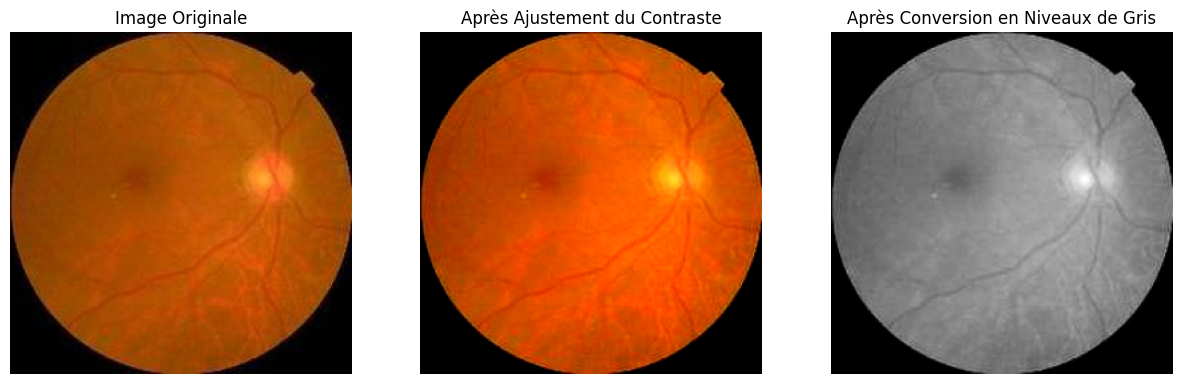

Traitement des images pour le dataset valid...
Image 012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg originale sauvegardée dans retinopathy_original/valid\DR\012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg
Image 012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid\DR\012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg
Image 012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/valid\DR\012a242ac6ff_png.rf.8f06c131247201fec1710cef7b526add.jpg
Image 0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg originale sauvegardée dans retinopathy_original/valid\DR\0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg
Image 0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid\DR\0180bfa26c0b_png.rf.19408cfb5eae8dcf97fa5dc4e7653d1e.jpg
Image 0

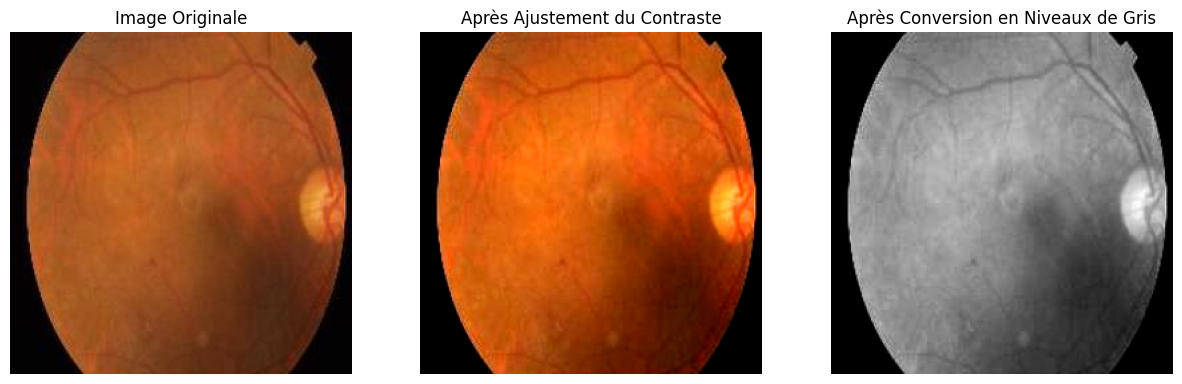

Traitement des images pour le dataset test...
Image 00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg originale sauvegardée dans retinopathy_original/test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
Image 00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
Image 00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
Image 0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg originale sauvegardée dans retinopathy_original/test\DR\0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg
Image 0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test\DR\0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg
Image 0104b03

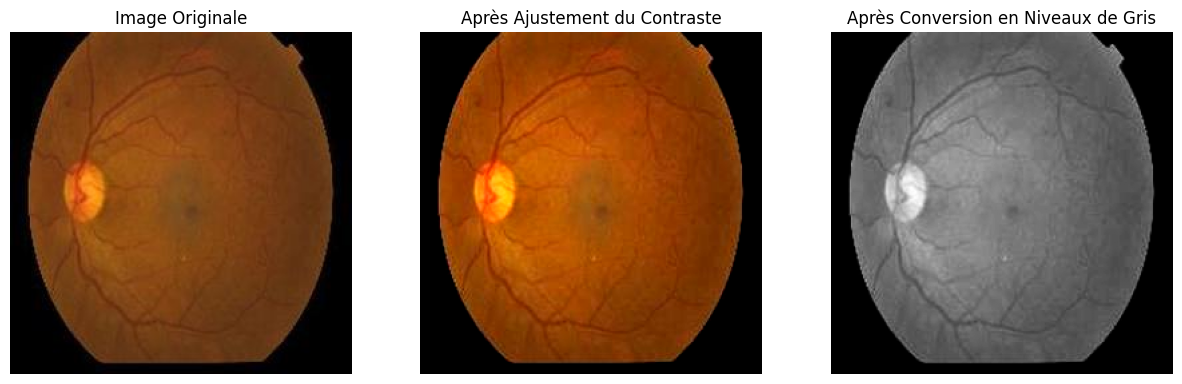

In [25]:
import os
import csv
import random
from PIL import Image, ImageEnhance, ExifTags
import matplotlib.pyplot as plt

# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
}
dest_folders = {
    'train': 'retinopathy_contrast_enhanced/train',
    'valid': 'retinopathy_contrast_enhanced/valid',
    'test': 'retinopathy_contrast_enhanced/test'
}
gray_dest_folders = {
    'train': 'retinopathy_gray/train',
    'valid': 'retinopathy_gray/valid',
    'test': 'retinopathy_gray/test'
}
original_dest_folders = {
    'train': 'retinopathy_original/train',
    'valid': 'retinopathy_original/valid',
    'test': 'retinopathy_original/test'
}
csv_file_paths = {
    'train': 'image_labels_train.csv',
    'valid': 'image_labels_valid.csv',
    'test': 'image_labels_test.csv'
}

# Facteur d'amélioration du contraste (exemple : 1.5 pour une légère amélioration)
contrast_factor = 1.5

# Fonction pour ajuster l'orientation des images selon leurs métadonnées EXIF
def adjust_image_orientation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = image._getexif()
        if exif is not None:
            orientation_value = exif.get(orientation)
            if orientation_value == 3:
                image = image.rotate(180, expand=True)
            elif orientation_value == 6:
                image = image.rotate(270, expand=True)
            elif orientation_value == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # Cas où l'image n'a pas de métadonnées EXIF
        pass
    return image

# Fonction pour améliorer le contraste des images, ajuster leur orientation, les convertir en niveaux de gris et les sauvegarder
def enhance_contrast_images(src_folder, dst_folder, gray_dst_folder, original_dst_folder, contrast_factor):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    if not os.path.exists(gray_dst_folder):
        os.makedirs(gray_dst_folder)
    if not os.path.exists(original_dst_folder):
        os.makedirs(original_dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    gray_dr_path = os.path.join(gray_dst_folder, 'DR')
    gray_no_dr_path = os.path.join(gray_dst_folder, 'No_DR')
    original_dr_path = os.path.join(original_dst_folder, 'DR')
    original_no_dr_path = os.path.join(original_dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    if not os.path.exists(gray_dr_path):
        os.makedirs(gray_dr_path)
    if not os.path.exists(gray_no_dr_path):
        os.makedirs(gray_no_dr_path)
    if not os.path.exists(original_dr_path):
        os.makedirs(original_dr_path)
    if not os.path.exists(original_no_dr_path):
        os.makedirs(original_no_dr_path)

    image_triplets = []  # Pour stocker les triplets d'images avant/après contraste et niveaux de gris

    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    # Ajuster l'orientation de l'image
                    img = adjust_image_orientation(img)
                    # Appliquer l'amélioration du contraste
                    enhancer = ImageEnhance.Contrast(img)
                    enhanced_img = enhancer.enhance(contrast_factor)
                    # Convertir l'image en niveaux de gris
                    gray_img = enhanced_img.convert('L')
                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                        gray_file_path = os.path.join(gray_no_dr_path, file)
                        original_file_path = os.path.join(original_no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                        gray_file_path = os.path.join(gray_dr_path, file)
                        original_file_path = os.path.join(original_dr_path, file)
                    # Enregistrer l'image originale, avec contraste amélioré et convertie en niveaux de gris
                    img.save(original_file_path)
                    enhanced_img.save(new_file_path)
                    gray_img.save(gray_file_path)
                    print(f"Image {file} originale sauvegardée dans {original_file_path}")
                    print(f"Image {file} avec contraste amélioré sauvegardée dans {new_file_path}")
                    print(f"Image {file} convertie en niveaux de gris sauvegardée dans {gray_file_path}")

                    # Ajouter le triplet d'images avant/après contraste et niveaux de gris pour affichage
                    image_triplets.append((img, enhanced_img, gray_img))

    return image_triplets

# Fonction pour écrire un fichier CSV avec les noms d'images et leurs étiquettes
def write_image_labels_to_csv(folder, csv_path):
    image_info = []
    for root, dirs, files in os.walk(folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            label = dir_name  # Label is the directory name (DR ou No_DR)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    image_info.append([file, label])
    # Écrire les informations des images dans un fichier CSV
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Label'])
        writer.writerows(image_info)
    print(f"Fichier CSV généré : {csv_path}")

# Améliorer le contraste des images, convertir en niveaux de gris et générer les fichiers CSV pour train, valid et test
for dataset in ['train', 'valid', 'test']:
    print(f"Traitement des images pour le dataset {dataset}...")
    image_triplets = enhance_contrast_images(source_folders[dataset], dest_folders[dataset], gray_dest_folders[dataset], original_dest_folders[dataset], contrast_factor)
    write_image_labels_to_csv(dest_folders[dataset], csv_file_paths[dataset])

    # Afficher une image aléatoire avant et après l'ajustement du contraste et après conversion en niveaux de gris
    if image_triplets:
        original_img, contrast_img, gray_img = random.choice(image_triplets)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Image Originale')
        plt.imshow(original_img)
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.title('Après Ajustement du Contraste')
        plt.imshow(contrast_img)
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.title('Après Conversion en Niveaux de Gris')
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
        plt.show()


In [30]:

%pip install pandas
%pip install numpy  
%pip install matplotlib
%pip install pillow
%pip install seaborn
%pip install scikit-learn

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 7.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 9.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.5 MB 6.4 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.5 MB 7.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.5 MB 7.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 6.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.5 MB 7.0 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.5 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 7.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 7.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 8.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 8.2 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 7.8 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.6/41.0 MB 8.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/41.0 MB 8.1 MB/s eta 0:00:05
   ---- ----------------------------------- 5.0/41.0 MB 8.0 MB/s eta 0:00:05
   ------ -


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
%pip install tensorflow
%pip install tqdm
%pip install keras
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 2.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.8/2.9 MB 1.5 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.9 MB 1.5 M


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#**Modele inception**  

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from sklearn.metrics import recall_score, f1_score, precision_score

source_folders = {
    'train_DR': 'retinopathy_contrast_enhanced/train/DR',
    'train_No_DR': 'retinopathy_contrast_enhanced/train/No_DR',
    'valid_DR': 'retinopathy_contrast_enhanced/valid/DR',
    'valid_No_DR': 'retinopathy_contrast_enhanced/valid/No_DR',
    'test_DR': 'retinopathy_contrast_enhanced/test/DR',
    'test_No_DR': 'retinopathy_contrast_enhanced/test/No_DR'
}

csv_file_paths = {
    'train': 'image_labels_train.csv',
    'valid': 'image_labels_valid.csv',
    'test': 'image_labels_test.csv'
}

class DatasetLoader(object):
    def __init__(self, data_type):
        print(f"Loading {data_type} data into memory...")
        sys.stdout.flush()
        labels = pd.read_csv(csv_file_paths[data_type])
        self.y = np.array([1 if l == 'DR' else 0 for l in labels['Label']])
        self.y = to_categorical(self.y, 2)
        self.X_location_DR = source_folders[f'{data_type}_DR']
        self.X_location_No_DR = source_folders[f'{data_type}_No_DR']
        self.size = self.y.shape[0]
        self.inds = np.arange(self.size)
        self.lst_imgs = np.array([l for l in labels['Image Name']])
        print("Done.")

    def get_size(self):
        return self.size

    def get_steps(self, batch_size):
        return self.size // batch_size

    def get_batch(self, n):
        selected_inds = np.random.choice(len(self.lst_imgs), size=n, replace=False)
        img_names = self.lst_imgs[selected_inds]
        label = self.y[selected_inds]
        images = []
        for img_name in img_names:
            try:
                img_path = os.path.join(self.X_location_No_DR, img_name)
                image = Image.open(img_path)
            except FileNotFoundError:
                img_path = os.path.join(self.X_location_DR, img_name)
                image = Image.open(img_path)
            images.append(np.array(image.resize((299, 299))).astype(np.float32))
        images = np.array(images)
        images = preprocess_input(images)
        return images, label

train_loader = DatasetLoader('train')
valid_loader = DatasetLoader('valid')
test_loader = DatasetLoader('test')

print('Training Size: ' + str(train_loader.get_size()) + ' images')
print('Validation Size: ' + str(valid_loader.get_size()) + ' images')
print('Test Size: ' + str(test_loader.get_size()) + ' images')

IMG_SHAPE = (299, 299, 3)

def build_model(input_shape, num_classes):
    base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model(IMG_SHAPE, 2)

# Training hyperparameters
batch_size = 32
nb_epochs = 20
train_steps_per_epoch = train_loader.get_steps(batch_size)
valid_steps = valid_loader.get_steps(batch_size)

# Metrics storage
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
valid_recalls = []
valid_f1_scores = []

# Training loop
for epoch in range(nb_epochs):
    print(f"Epoch {epoch + 1}/{nb_epochs}")
    epoch_train_loss = []
    epoch_train_acc = []
    epoch_valid_loss = []
    epoch_valid_acc = []
    epoch_valid_pred = []
    epoch_valid_true = []

    # Training
    for idx in tqdm(range(train_steps_per_epoch)):
        x, y = train_loader.get_batch(batch_size)
        metrics = model.train_on_batch(x, y)
        epoch_train_loss.append(metrics[0])
        epoch_train_acc.append(metrics[1])

    # Validation
    for idx in tqdm(range(valid_steps)):
        x, y = valid_loader.get_batch(batch_size)
        metrics = model.test_on_batch(x, y)
        epoch_valid_loss.append(metrics[0])
        epoch_valid_acc.append(metrics[1])
        y_pred = model.predict(x)
        y_true = np.argmax(y, axis=1)
        y_pred = np.argmax(y_pred, axis=1)
        epoch_valid_pred.extend(y_pred)
        epoch_valid_true.extend(y_true)

    # Compute average training and validation metrics
    train_loss = np.mean(epoch_train_loss)
    train_acc = np.mean(epoch_train_acc)
    valid_loss = np.mean(epoch_valid_loss)
    valid_acc = np.mean(epoch_valid_acc)
    valid_recall = recall_score(epoch_valid_true, epoch_valid_pred)
    valid_f1 = f1_score(epoch_valid_true, epoch_valid_pred)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)
    valid_recalls.append(valid_recall)
    valid_f1_scores.append(valid_f1)

    print(f'Train Loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Valid Loss: {valid_loss}, Valid Accuracy: {valid_acc}')
    print(f'Valid Recall: {valid_recall}, Valid F1-Score: {valid_f1}')

# Final test evaluation
test_pred = []
test_true = []
epoch_test_loss = []
epoch_test_acc = []

for idx in tqdm(range(test_loader.get_steps(batch_size))):
    x, y = test_loader.get_batch(batch_size)
    metrics = model.test_on_batch(x, y)
    epoch_test_loss.append(metrics[0])
    epoch_test_acc.append(metrics[1])
    y_pred = model.predict(x)
    y_true = np.argmax(y, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    test_pred.extend(y_pred)
    test_true.extend(y_true)

test_loss = np.mean(epoch_test_loss)
test_acc = np.mean(epoch_test_acc)
test_recall = recall_score(test_true, test_pred)
test_f1 = f1_score(test_true, test_pred)
test_precision = precision_score(test_true, test_pred)

print('\n',f'Test Loss: {test_loss * 100}%')
print(f'Test Accuracy: {test_acc*100}%')
print(f'Test Precision: {test_precision * 100}%')
print(f'Test Recall: {test_recall * 100}%')
print(f'Test F1-Score: {test_f1*100}%')

# Plotting
epochs_range = range(nb_epochs)

plt.figure(figsize=(14, 7))

plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


ModuleNotFoundError: No module named 'tensorflow'